In [2]:
import numpy as np
import matplotlib.colors as colors
from cartopy import config
import cartopy.crs as ccrs
from matplotlib import colors
from matplotlib.cm import get_cmap
import colorcet as cc
import matplotlib.pyplot as plt
import cartopy.mpl.ticker as cticker
import xarray as xr

load data

In [3]:
#load vertical cross-sections
ds=xr.open_dataset('/net/ch4/atmcirc/zilnora/era5_midwinter/data/netcdf_filtering/monthdir/EKE_mean_cross_allmonths')

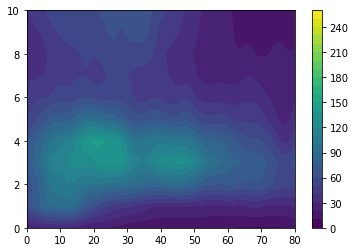

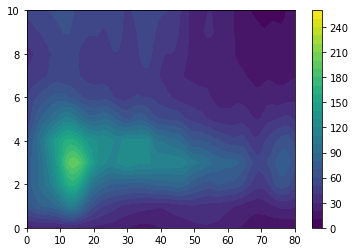

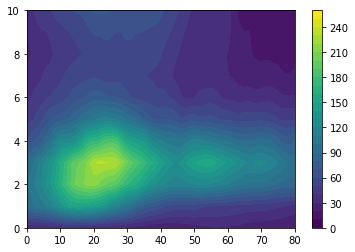

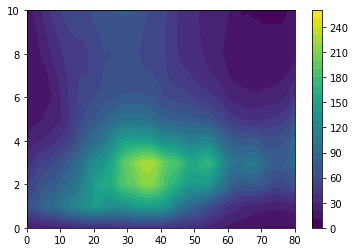

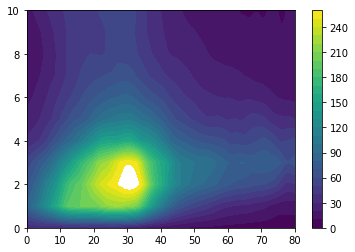

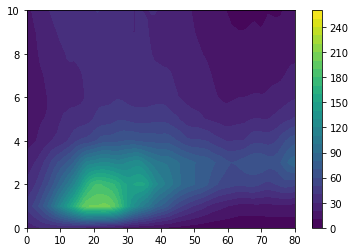

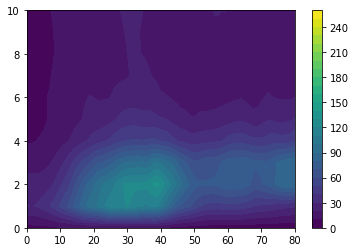

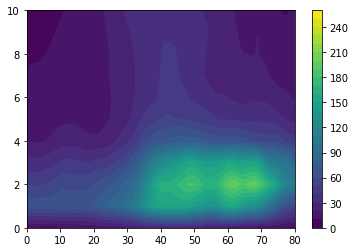

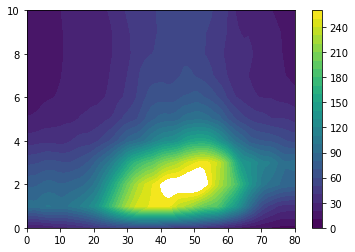

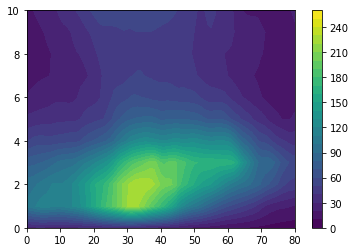

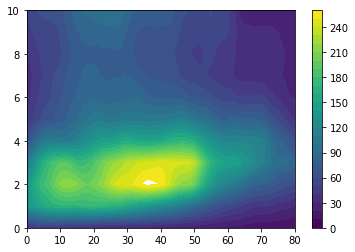

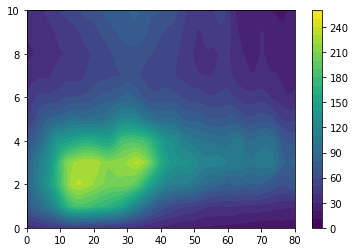

In [11]:
for i in range(12):
    plt.contourf(ds.EKE[i,:,:,0],levels=np.arange(0,270,10))
    plt.colorbar()
    plt.show()